In [1]:
# Packages laden
import pandas as pd
import numpy as np
from keras.layers import Convolution1D, Dense, MaxPooling1D, Flatten, Dropout
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from keras.backend import binary_crossentropy
from matplotlib import pyplot as plt
from math import sqrt

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# laden der Daten
DATA_FILE="Dropbox/Masterarbeit/Masterarbeit/Datensätze/Geburtenrate/Datensatz.xlsx"
df = pd.read_excel(DATA_FILE)
df=pd.read_excel(DATA_FILE, header=0, parse_dates=[0], index_col='Jahr-Monat',squeeze=True,)

In [3]:
# Ein array mit allen Einträgen --> zur besseren Weiterverarbeitung
ZR=df.values

In [4]:
# Anteil der Datensätze am Gesamtdatensatz
ZR_100=ZR

In [5]:
# Preprocessing der Rohdaten: 100%
ZR_100new=np.atleast_2d(ZR_100)
if ZR_100new.shape[0]==1:
    ZR_100new=ZR_100new.T
nb_samples_100, nb_series_100 = ZR_100new.shape

In [6]:
# Einteilung in Trainings- und Testdaten: nicht mehr ZR sondern X --> X_train etc
test_size_100=int(0.3*nb_samples_100)
train_100, test_100 = ZR_100[:-test_size_100], ZR_100[-test_size_100:] 

In [7]:
# Shape des Input und Outputs anpassen: 100%
look_forward=240
window_size=12
# Trainingsdaten
Xtrain_100=np.atleast_3d(np.array([train_100[start:start+window_size] for start in range(0, train_100.shape[0]-(window_size+look_forward))]))
ytrain_100=train_100[window_size+look_forward:]
qtrain_100=np.atleast_3d([train_100[-(window_size):]])
print(qtrain_100.shape, ytrain_100.shape, Xtrain_100.shape)

# Testdaten
Xtest_100=np.atleast_3d(np.array([test_100[start:start+window_size] for start in range(0, test_100.shape[0]-(window_size+look_forward))]))
ytest_100=test_100[window_size+look_forward:]
qtest_100=np.atleast_3d([test_100[-(window_size):]])
print(qtest_100.shape, ytest_100.shape, Xtest_100.shape)

(1, 12, 1) (353,) (353, 12, 1)
(1, 12, 1) (6,) (6, 12, 1)


In [8]:
# Modell zusammenbauen: 
nb_filter_1=32
nb_filter_2=64
nb_filter_3=64
filter_length=2
nb_input_series=1
nb_outputs=1
model= Sequential()
model.add(Convolution1D(nb_filter=nb_filter_1, filter_length=filter_length, activation='relu', 
                        input_shape=(window_size, nb_input_series)))
model.add(Convolution1D(nb_filter=nb_filter_2, filter_length=filter_length, activation='relu'))
model.add(MaxPooling1D())
model.add(Convolution1D(nb_filter=nb_filter_3, filter_length=filter_length, activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(nb_outputs, activation='linear')) 
model.compile(loss='mse', optimizer='adam', metrics=['mae']) 

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", input_shape=(12, 1), filters=32, kernel_size=2)`
  # Remove the CWD from sys.path while we load stuff.


Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=64, kernel_size=2)`
  # This is added back by InteractiveShellApp.init_path()
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=64, kernel_size=2)`
  del sys.path[0]


In [9]:
# Modellzusammenfassung
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 11, 32)            96        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 4, 64)             8256      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total para

In [30]:
# Replizierbarkeit gewährleisten
np.random.seed(7)

In [31]:
# Modellanpassen: 100%
history_reg=model.fit(Xtrain_100, ytrain_100, epochs=200, batch_size=25, validation_data=(Xtest_100, ytest_100))

Train on 353 samples, validate on 6 samples
Epoch 1/200
353/353 [==============================] - 0s 382us/step - loss: 127171785.1331 - mean_absolute_error: 9103.6280 - val_loss: 357997408.0000 - val_mean_absolute_error: 15770.1836
Epoch 2/200
353/353 [==============================] - 0s 428us/step - loss: 128176097.2691 - mean_absolute_error: 8924.2905 - val_loss: 253335120.0000 - val_mean_absolute_error: 13349.6689
Epoch 3/200
353/353 [==============================] - 0s 368us/step - loss: 137563131.8187 - mean_absolute_error: 9378.6566 - val_loss: 253181056.0000 - val_mean_absolute_error: 13232.0557
Epoch 4/200
353/353 [==============================] - 0s 323us/step - loss: 121418678.6062 - mean_absolute_error: 8653.4656 - val_loss: 329258784.0000 - val_mean_absolute_error: 15075.6045
Epoch 5/200
353/353 [==============================] - 0s 354us/step - loss: 118774780.1700 - mean_absolute_error: 8731.5285 - val_loss: 336226880.0000 - val_mean_absolute_error: 15202.3916
Epoch 

Epoch 44/200
353/353 [==============================] - 0s 368us/step - loss: 105535745.3541 - mean_absolute_error: 8171.1308 - val_loss: 314008800.0000 - val_mean_absolute_error: 14351.6221
Epoch 45/200
353/353 [==============================] - 0s 368us/step - loss: 107737796.5666 - mean_absolute_error: 8302.8971 - val_loss: 355324832.0000 - val_mean_absolute_error: 15227.3369
Epoch 46/200
353/353 [==============================] - 0s 314us/step - loss: 114000421.1558 - mean_absolute_error: 8530.1006 - val_loss: 268568032.0000 - val_mean_absolute_error: 13575.9404
Epoch 47/200
353/353 [==============================] - 0s 391us/step - loss: 100026331.4674 - mean_absolute_error: 7898.3880 - val_loss: 304127936.0000 - val_mean_absolute_error: 13995.6533
Epoch 48/200
353/353 [==============================] - 0s 374us/step - loss: 101524308.3626 - mean_absolute_error: 8002.3460 - val_loss: 322509632.0000 - val_mean_absolute_error: 14457.2295
Epoch 49/200
353/353 [=======================

353/353 [==============================] - 0s 320us/step - loss: 89585922.9462 - mean_absolute_error: 7280.7343 - val_loss: 374156544.0000 - val_mean_absolute_error: 15859.4814
Epoch 88/200
353/353 [==============================] - 0s 360us/step - loss: 98203612.7365 - mean_absolute_error: 7896.1660 - val_loss: 270103456.0000 - val_mean_absolute_error: 13117.2373
Epoch 89/200
353/353 [==============================] - 0s 417us/step - loss: 92110504.9235 - mean_absolute_error: 7681.7161 - val_loss: 292517984.0000 - val_mean_absolute_error: 13481.8604
Epoch 90/200
353/353 [==============================] - 0s 371us/step - loss: 91988696.9292 - mean_absolute_error: 7541.5913 - val_loss: 311629984.0000 - val_mean_absolute_error: 14755.5859
Epoch 91/200
353/353 [==============================] - 0s 346us/step - loss: 97888648.4873 - mean_absolute_error: 7828.6820 - val_loss: 206029504.0000 - val_mean_absolute_error: 11466.5322
Epoch 92/200
353/353 [==============================] - 0s 334u

353/353 [==============================] - 0s 408us/step - loss: 86345144.4136 - mean_absolute_error: 7383.2374 - val_loss: 257830768.0000 - val_mean_absolute_error: 12619.0000
Epoch 131/200
353/353 [==============================] - 0s 317us/step - loss: 81491317.4164 - mean_absolute_error: 7122.7950 - val_loss: 230992064.0000 - val_mean_absolute_error: 12008.1240
Epoch 132/200
353/353 [==============================] - 0s 303us/step - loss: 79544247.6601 - mean_absolute_error: 6954.2490 - val_loss: 285466112.0000 - val_mean_absolute_error: 13497.6943
Epoch 133/200
353/353 [==============================] - 0s 323us/step - loss: 81548433.8357 - mean_absolute_error: 7123.7958 - val_loss: 207038384.0000 - val_mean_absolute_error: 11452.9072
Epoch 134/200
353/353 [==============================] - 0s 348us/step - loss: 78664217.8357 - mean_absolute_error: 6868.6901 - val_loss: 278202336.0000 - val_mean_absolute_error: 13168.5576
Epoch 135/200
353/353 [==============================] - 0s

Epoch 173/200
353/353 [==============================] - 0s 365us/step - loss: 104338518.3003 - mean_absolute_error: 8064.4155 - val_loss: 228240144.0000 - val_mean_absolute_error: 13266.3486
Epoch 174/200
353/353 [==============================] - 0s 442us/step - loss: 98145249.0652 - mean_absolute_error: 7652.0469 - val_loss: 275274208.0000 - val_mean_absolute_error: 12948.8564
Epoch 175/200
353/353 [==============================] - 0s 340us/step - loss: 76011483.5694 - mean_absolute_error: 6894.0796 - val_loss: 237246656.0000 - val_mean_absolute_error: 12261.5000
Epoch 176/200
353/353 [==============================] - 0s 323us/step - loss: 77149523.2181 - mean_absolute_error: 6784.5478 - val_loss: 180462736.0000 - val_mean_absolute_error: 10925.4307
Epoch 177/200
353/353 [==============================] - 0s 314us/step - loss: 72581710.3626 - mean_absolute_error: 6721.6669 - val_loss: 189628912.0000 - val_mean_absolute_error: 11010.5576
Epoch 178/200
353/353 [=====================

Text(0.5,1,'Loss Curves')

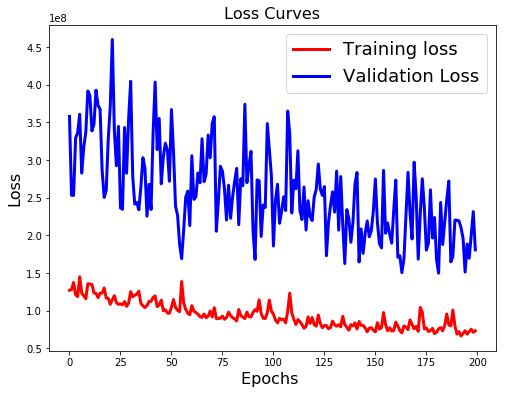

In [32]:
#Ploten der Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5,1,'Accuracy Curves')

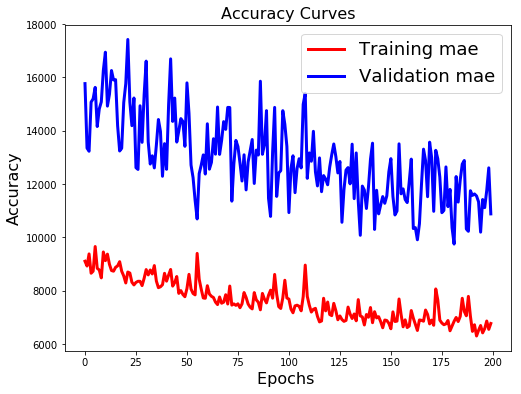

In [33]:
#Plotten der Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['mean_absolute_error'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_mean_absolute_error'],'b',linewidth=3.0)
plt.legend(['Training mae', 'Validation mae'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [34]:
# Vorhersage generieren
predictions_100 = model.predict(Xtest_100)

predictions_train_100=model.predict(Xtrain_100)

In [35]:
# Modellperformance bewerten
mse = mean_squared_error(ytest_100, predictions_100)
print('Test MSE: %.3f' % mse)

mse_train = mean_squared_error(ytrain_100, predictions_train_100)
print('Train MSE: %.3f' % mse_train)

Test MSE: 180816561.164
Train MSE: 71722748.698


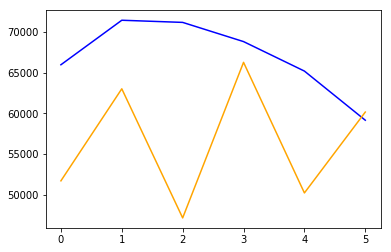

In [36]:
# Vorhersage und Testdaten abtragen
plt.plot(ytest_100, color='blue') 
plt.plot(predictions_100, color='orange') 
plt.show()

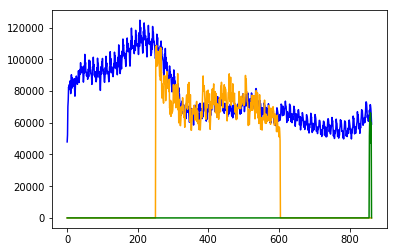

In [37]:
# Verschiebung der Trainingsvorhersage zum Plotten
trainPredictPlot = np.empty_like(ZR_100)
trainPredictPlot[:]=[0]*len(ZR_100)
trainPredictPlot = trainPredictPlot.reshape(len(ZR_100),1)
trainPredictPlot[(window_size+look_forward-1):len(predictions_train_100)+(window_size+look_forward-1)] = predictions_train_100


# Verschiebung der Testvorhersage zum Plotten
testPredictPlot = np.empty_like(ZR_100)
testPredictPlot[:]=[0]*len(ZR_100)
testPredictPlot = testPredictPlot.reshape(len(ZR_100),1)
testPredictPlot[len(predictions_train_100)+2*(window_size+look_forward)-1:len(ZR_100)-1] = predictions_100
     
       
# Plotten der baseline und  der Vorhersagen
plt.plot(ZR_100, color='blue')
plt.plot(trainPredictPlot, color='orange') 
plt.plot(testPredictPlot, color='green')
plt.show()